In [0]:
# !pip install parse

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

!ls drive

# !pip install theano


In [0]:
%matplotlib inline
import keras 
import numpy as np 
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import itertools


In [3]:
model = VGG16()

553467904/553467096 [==============================] - 26s 0us/step


In [4]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
type(model)

keras.engine.training.Model

In [0]:
from keras.models import Sequential

newModel = Sequential()

for layer in model.layers:
  newModel.add(layer)

In [7]:
newModel.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
newModel.layers.pop()

In [10]:
newModel.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in newModel.layers:
  layer.trainable = False

In [0]:
from keras.layers import Dense, Flatten, Dropout


newModel.add(Dense(2, activation='softmax'))

In [14]:
newModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras.optimizers import Adam

#Compiling Model 
newModel.compile(Adam(lr=.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:

train_path = 'drive/Colab/Bachelor/dataset/train'
test_path = 'drive/Colab/Bachelor/dataset/test'
valid_path = 'drive/Colab/Bachelor/dataset/valid'

In [56]:
from keras.preprocessing.image import ImageDataGenerator

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['original', 'spliced'], batch_size=10)
test_batches =  ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['original', 'spliced'], batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['original', 'spliced'], batch_size=10)

imgs, labels = next(train_batches)


Found 400 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [0]:
# checkpoint
filepath="drive/Colab/Bachelor/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


### Is GPU Working?

####To see if you are currently using the GPU in Colab, you can run the following code in order to cross-check:



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()


### Which GPU Am I Using?


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


### What about RAM?


In [0]:
!cat /proc/meminfo


### What about CPU?


In [0]:
!cat /proc/cpuinfo


### Testing how many of The gpu RAM we have

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


#Train The Model

In [0]:
newModel.fit_generator(train_batches, steps_per_epoch=40, validation_data=valid_batches, validation_steps=40, epochs=5, callbacks=callbacks_list, verbose=2)



## Saving The Model

In [0]:
# newModel.save('drive/Colab/Bachelor/CNNImageSplicingDetectorModel.h5')  # creates a HDF5 file 'my_model.h5'


# keras library import  for Saving and loading model and weights

from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = newModel.to_json()


with open("drive/Colab/Bachelor/CNNImageSplicingDetectorModel.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
newModel.save_weights("drive/Colab/Bachelor/CNNImageSplicingDetectorModelWeights.h5")



## Making a predection with our Model

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [0]:
newModel.summary()

In [74]:
from sklearn.metrics import confusion_matrix

test_imgs, test_labels = next(test_batches)


test_labels = test_labels[:,0]

test_labels



array([1., 0., 0., 1.], dtype=float32)

In [0]:

predections = newModel.predict_generator(test_batches, steps=1, verbose=0)



In [81]:
print (test_labels)
print (np.round(predections[:,0]))

cn =  confusion_matrix(test_labels, np.round(predections[:,0]))


[1. 0. 0. 1.]
[1. 0. 1. 0.]


Confusion matrix, without normalization
[[2 0]
 [0 2]]


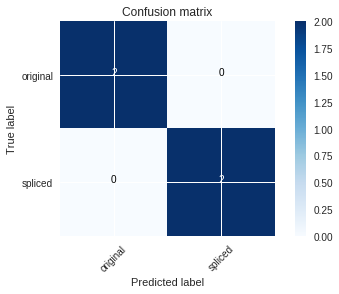

In [76]:
cn_plot_labels = ['original', 'spliced']


plot_confusion_matrix(cn , cn_plot_labels, title='Confusion matrix')